<br>
<img src="https://images.even3.com.br/ONieRmTALZ2ETt2LfoUY4_IopIU=/fit-in/250x250/smart/even3.blob.core.windows.net/logos/UFCSPA-logotipo-1.19fc99573cf34163a727.png" style="width: 100px;"/>
<center>Diagnóstico por imagem
    <br>
    Professoras Carla Becker, Thatiane Alva e Viviane Botelho
    <br>
    Discente André Gonçalves Jardim</center>
    
# <center><font color='blue'>Redes Convolucionais</font></center>


In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
import cv2
import time
import numpy as np
import keras as ke
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, LeakyReLU, GlobalAveragePooling2D
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from scipy.spatial.distance import pdist, squareform

%config Completer.use_jedi = False

import warnings
warnings.simplefilter("ignore")

## Importando as imagens

In [2]:
t1=time.time()
t2=time.time()



# Vetores de imagens e labels
image_data = []
label_data = []

TAMANHO_XY = 120

for filename in os.listdir('no/'):
    img = cv2.imread(os.path.join('no/',filename), cv2.IMREAD_GRAYSCALE)
    if img is not None:
        image_data.append(np.array(cv2.resize(img, (TAMANHO_XY, TAMANHO_XY), interpolation=cv2.INTER_AREA)))
        label_data.append(0)
        
for filename in os.listdir('yes/'):
    img = cv2.imread(os.path.join('yes/',filename), cv2.IMREAD_GRAYSCALE)
    if img is not None:
        image_data.append(np.array(cv2.resize(img, (TAMANHO_XY, TAMANHO_XY), interpolation=cv2.INTER_AREA)))
        label_data.append(1)

image_data = np.array(image_data)        
label_data = np.array(label_data)

print(f'Imagens: {image_data.shape})')
print(f'Numero de Labels: {len(label_data)}')

print("\ntempo de execução:"+str(round(time.time()-t1,2))+"s")

Imagens: (3000, 120, 120))
Numero de Labels: 3000

tempo de execução:3.36s


## Separando imagens em treitno, teste e validação

In [3]:
t1=time.time()

# dados -> treino/validação e teste
image_treino, image_teste, label_treino, label_teste = train_test_split(image_data, label_data, test_size=0.1, random_state=13)

print("tempo de execução:"+str(round(time.time()-t1,2))+"s")

tempo de execução:0.02s


## Normalizando os dados e passando para one-hot encoding

In [4]:
t1=time.time()

#Redimensionando as imagens
image_treino = image_treino.reshape(2700, TAMANHO_XY, TAMANHO_XY, 1)
image_teste = image_teste.reshape(300, TAMANHO_XY, TAMANHO_XY, 1)


# Normalizar os dados
image_treino = image_treino.astype('float32')
image_teste = image_teste.astype('float32')

# Normalizar os dados
image_treino = image_treino/255.0
image_teste = image_teste/255.0

label_treino_one_hot = to_categorical(label_treino)
label_teste_one_hot = to_categorical(label_teste)


print(f'Imagens de treino : {image_treino.shape} \t Numero de Labels de treino: {len(label_treino)}')
print(f'Imagens de teste : {image_teste.shape} \t         Numero de Labels de teste: {len(label_teste)}')
print("\ntempo de execução:"+str(round(time.time()-t1,2))+"s")

Imagens de treino : (2700, 120, 120, 1) 	 Numero de Labels de treino: 2700
Imagens de teste : (300, 120, 120, 1) 	         Numero de Labels de teste: 300

tempo de execução:0.13s


# Representando as imagens

tempo de execução:0.04s


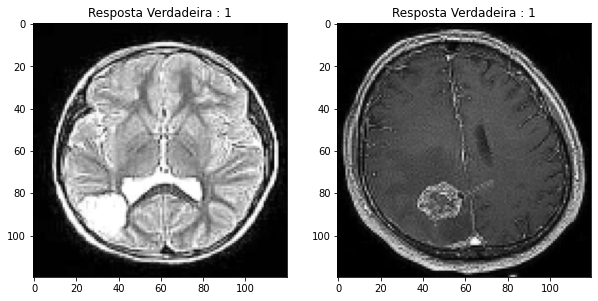

In [5]:
t1=time.time()

plt.figure(figsize=[10,10])

# Display na 1a imagem nos dados de treinamento:
plt.subplot(121)
plt.imshow(image_treino[0], cmap='gray')
plt.title("Resposta Verdadeira : {}".format(label_treino[0]))

# Display na 11a image dos dados de teste:
plt.subplot(122)
plt.imshow(image_teste[10], cmap='gray')
plt.title("Resposta Verdadeira : {}".format(label_teste[10]))

print("tempo de execução:"+str(round(time.time()-t1,2))+"s")

In [6]:
t1=time.time()

# FIXANDO UM PESSO ALEATÓRIO PARA COMEÇAR O APRENDIZADO
# # fixar o pseudo-random generator do tensorflow
tf.random.set_seed(10)

# CRIANDO A REDE
model = Sequential() 
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(TAMANHO_XY,TAMANHO_XY,1), padding='same'))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())

# CAMADAS
model.add(Dropout(0.4))
model.add(Dense(500, activation='relu'))  
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

model.summary()

print("tempo de execução:"+str(round(time.time()-t1,2))+"s")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 120, 120, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 60, 60, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 60, 60, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 32)        0

In [7]:
t1=time.time()

# listas vazias para armazenar resultados do k-folds
acc_per_fold=[]  
loss_per_fold=[]
espec_per_fold=[]
sens_per_fold=[]
all_models=[]
all_loss=[]
all_acc=[]
all_vloss=[]
all_vacc=[]

# Define the K-fold Cross Validator
k = 3
kfold = KFold(n_splits=k, shuffle=True)

fold_no = 0
for train, val in kfold.split(image_treino, label_treino):
    
    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
    
    adam = Adam(lr=0.0001)
    model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
    
    history= model.fit(image_treino[train], # Dados de treino
                       label_treino[train], # Respostas de treino
                       batch_size=32, 
                       epochs=30, 
                       validation_data=(image_treino[val], label_treino[val]),# Dados de validação
                       verbose=False)
    
    Y_pred = model(image_treino[val])
    y_pred = np.round(Y_pred)
    cmat=confusion_matrix(label_treino[val],y_pred,labels=[0,1])
    
    acuracia=np.sum(np.diag(cmat))*100/np.sum(cmat)
    sensibilidade=cmat[1,1]/(cmat[0,1]+cmat[1,1])*100
    especificidade=cmat[0,0]/(cmat[1,0]+cmat[0,0])*100
    
    acc_per_fold.append(sensibilidade)
    espec_per_fold.append(especificidade)
    sens_per_fold.append(sensibilidade)
    
    all_models.append(model)
    
    all_vloss.append(history.history["val_loss"])
    all_vacc.append(history.history["val_accuracy"])
    all_loss.append(history.history["loss"])
    all_acc.append(history.history["accuracy"])
    
    # Increase fold number
    fold_no = fold_no + 1
    print("\ntempo de execução fold "+str(k)+": "+str(round(time.time()-t1,2))+"s")
    
print("\ntempo de execução:"+str(round(time.time()-t1,2))+"s")

------------------------------------------------------------------------
Training for fold 0 ...

tempo de execução fold 3: 733.33s
------------------------------------------------------------------------
Training for fold 1 ...

tempo de execução fold 3: 1468.26s
------------------------------------------------------------------------
Training for fold 2 ...

tempo de execução fold 3: 2197.86s

tempo de execução:2197.86s


# Curva de aprendizado

,Acurácia,Sensibilidade,Especificidade
0,97.639485,97.639485,96.313364
1,98.883929,98.883929,98.672566
2,99.316629,99.316629,100.000000


=== média ===
Acurácia          98.613347
Sensibilidade     98.613347
Especificidade    98.328643
dtype: float64
  
=== variância ===
Acurácia          0.505409
Sensibilidade     0.505409
Especificidade    2.324356
dtype: float64
=== min ===
Acurácia          97.639485
Sensibilidade     97.639485
Especificidade    96.313364
dtype: float64
  
=== max ===
Acurácia           99.316629
Sensibilidade      99.316629
Especificidade    100.000000
dtype: float64
tempo de execução:0.24s


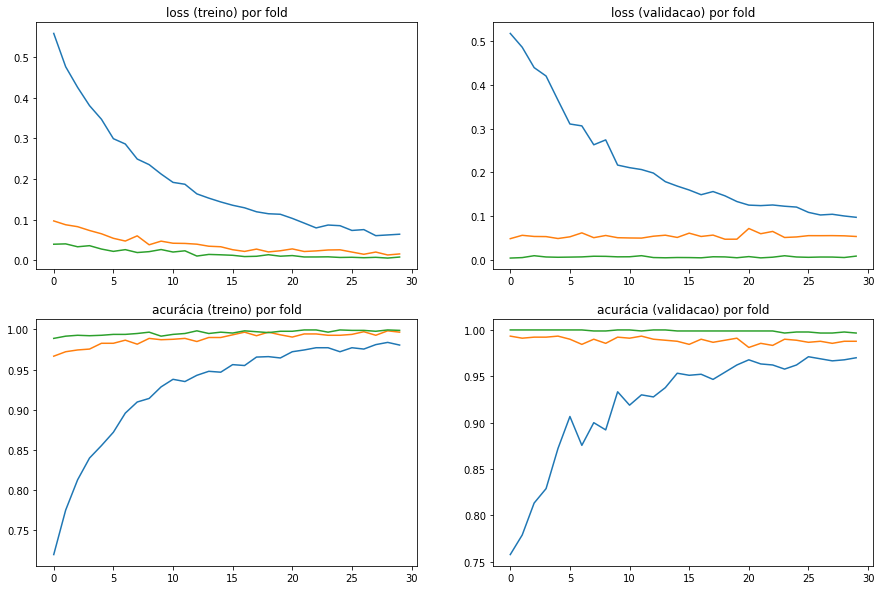

In [8]:
t1=time.time()

results = pd.DataFrame( {'Acurácia':acc_per_fold, 'Sensibilidade': sens_per_fold, 'Especificidade': espec_per_fold})
display(results)

print('=== média ===')
print(np.mean(results))
print('  ')
print('=== variância ===')
print(np.var(results))
print('=== min ===')
print(np.min(results))
print('  ')
print('=== max ===')
print(np.max(results))


plt.figure(figsize=(15,10))
for i in range(0,k):
    plt.subplot(2,2,1)
    plt.plot(all_loss[i])
    plt.title('loss (treino) por fold')
    plt.subplot(2,2,2)
    plt.plot(all_vloss[i])
    plt.title('loss (validacao) por fold')
    plt.subplot(2,2,3)
    plt.plot(all_acc[i])
    plt.title('acurácia (treino) por fold')
    plt.subplot(2,2,4)
    plt.plot(all_vacc[i])
    plt.title('acurácia (validacao) por fold')

print("tempo de execução:"+str(round(time.time()-t1,2))+"s")

### Relatório de classificação: TESTE DA REDE

In [9]:
t1=time.time()

predicted_classes = model.predict(image_teste)
predicted_classes = np.round(predicted_classes)

cmat = confusion_matrix(label_teste, predicted_classes)

cmat_df = pd.DataFrame(cmat,
                     index = ['0','1'], 
                     columns = ['0','1'])

target_names = ["Class {}".format(i) for i in range(2)]

print(classification_report(label_teste, predicted_classes, target_names=target_names))

# Definição das medidas de acurácia, sensibilidade e especificidade
acuracia = np.sum(np.diag(cmat))*100/np.sum(cmat)
sensibilidade = cmat_df.iloc[1][1]/(cmat_df.iloc[0][1]+cmat_df.iloc[1][1])*100
especificidade = cmat_df.iloc[0][0]/(cmat_df.iloc[1][0]+cmat_df.iloc[0][0])*100

print(f'Acurácia: {round(acuracia, 2)}%\nSensibilidade: {round(sensibilidade, 2)}%\nEspecificidade: {round(especificidade, 2)}%')

print("\nTempo de execução:"+str(round(time.time()-t1,2))+"s")

              precision    recall  f1-score   support

     Class 0       0.98      0.98      0.98       156
     Class 1       0.98      0.98      0.98       144

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300

Acurácia: 98.0%
Sensibilidade: 97.92%
Especificidade: 98.08%

Tempo de execução:0.84s


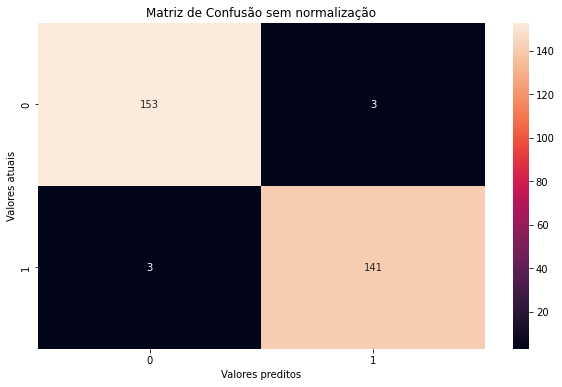


tempo de execução:0.19s
tempo de execução TOTAL:36.73min


In [10]:
t1=time.time()

#Plotando:
plt.figure(figsize=(10,6))
sns.heatmap(cmat_df, annot=True,fmt="d")
plt.title('Matriz de Confusão sem normalização')
plt.ylabel('Valores atuais')
plt.xlabel('Valores preditos')
plt.show()

print("\ntempo de execução:"+str(round(time.time()-t1,2))+"s")
print("tempo de execução TOTAL:"+str(round((time.time()-t2)/60,2))+"min")